## House Price Prediction using Regression 
### Dataset: Melbourne Housing

#### In this study we follow the CRISP-DM process 

#### 1. Business Understanding
#### 2. Data understanding
#### 3. Data Preparation
#### 4. Data Modeling
#### 5. Evaluation of the model

We will be answering the following questions based on our study

1. What is the trend of the house prices?
2. How to Handle categorical and missing data?
3. What are the highest correlated variables to price? 
4. What are the key factors affecting price of a House?

    


In [1]:
# importing all the libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm_model

#### Reading Dataset and checking the shape of the dataset

In [2]:
Housing_data = pd.read_csv("Melbourne_housing_FULL.csv")
# df.describe()
print("Size of the Housing data",Housing_data.shape)
Housing_data.head()
Housing_data.columns
Housing_data.dtypes
Housing_data.Price.describe()

Size of the Housing data (34857, 21)


count    2.724700e+04
mean     1.050173e+06
std      6.414671e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64


### Checking trend of House Price


Let's prepare the data
•	Check the missing values in price and drop those variables
•	Group the price by Month and year
•	Plot the Price vs Date



In [3]:
# We have to predict the price based on other features available in the data set.  
#Check for the missing values in the data
Miss_val_prop = Housing_data.isnull().mean() #Proportion of null values in Price column

#Let's look for the Proportion of missing values in the price column
Prop_Price = Housing_data["Price"].isnull().mean() #Proportion of null values in Price column
print("Proportion of Null values in Price column is",Prop_Price) 
# Dropping na values in price
drpna = Housing_data.dropna(subset = ['Price'], axis =0) 
drpna

Proportion of Null values in Price column is 0.2183205668875692


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/3/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/6/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


Oops!! There are 21.8% of the values are missing from the Price variable. Hence we dropped those rows with null values.
Let's plot and check the trend of Dependent varible

In [4]:
# Splitting the date based on Day Month and Year
Housing_data['Day'],Housing_data['Month'],Housing_data['Year']= Housing_data['Date'].str.split('/',2).str
Price_By_YM = Housing_data.groupby(['Year','Month']).Price.mean()
Price_By_YM = Price_By_YM.reset_index()
Price_By_YM = Price_By_YM.rename(columns = {'Price':'Average_Price'})
Price_By_YM['Year-Month'] = Price_By_YM['Year'].map(str)+ "-" + Price_By_YM['Month'].map(str)
Price_By_YM.to_csv('MeanPrice_by_YM.csv')
Price_By_YM.head()

<ipython-input-4-6074f8c56e9e>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Housing_data['Day'],Housing_data['Month'],Housing_data['Year']= Housing_data['Date'].str.split('/',2).str


,Year,Month,Average_Price,Year-Month
0,2016,01,1.009000e+06,2016-01
1,2016,04,1.006784e+06,2016-04
2,2016,05,1.037713e+06,2016-05
3,2016,06,1.028951e+06,2016-06
4,2016,07,9.479466e+05,2016-07


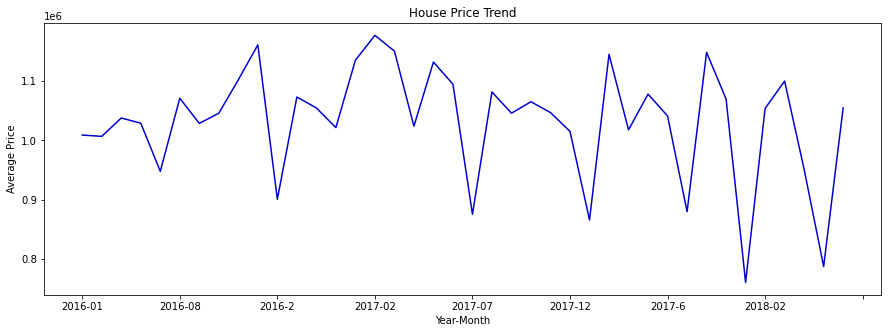

In [5]:
objects = Price_By_YM['Year-Month']
y_pos = Price_By_YM['Average_Price']

Price_By_YM.plot(
           kind='line', 
           x='Year-Month',
           y='Average_Price',
           color = '#0000cd', 
           figsize =(15,5), 
           title = 'House Price Trend', 
           legend = False)
plt.ylabel('Average Price')
plt.savefig('HousePriceTrend.png')

From the above plot we can clearly see that the average prices are declining through out the period. Basically the over all trend is decreasing. This answers our first question.

Let's checkout how other features in the data set

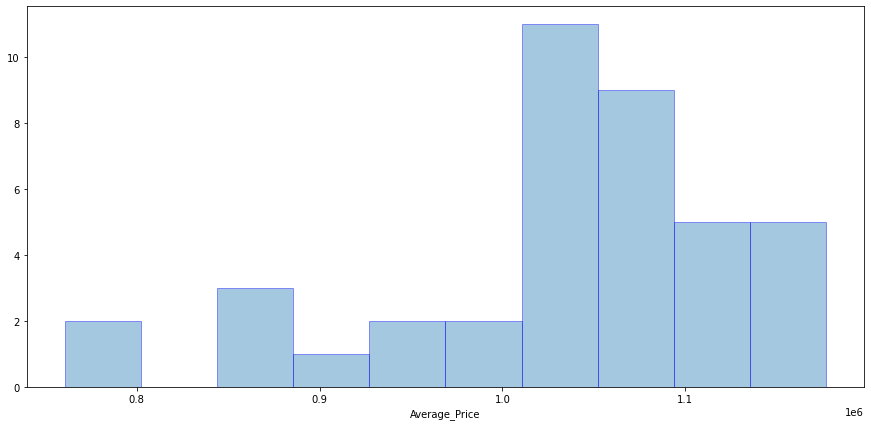

In [6]:
## Let's check out the disctribution of Price variable
plt.figure(figsize=(15,7))
ax = sns.distplot(Price_By_YM['Average_Price'], kde = False,hist_kws=dict(edgecolor="b"))
plt.savefig('Distribution of Average price.png')


### Checking categorical values and filling them using label Encoder


•	Select the object type variables, Check how many columns has missing values
•   Plot the columns with missing values
•	Fill the missing values in categorical columns using label encoder

In [7]:
# Checking the count of dtypes
drpna.dtypes.value_counts() 
#copying objects to a data frame
obj_df = drpna.select_dtypes(include = ['object']).copy() 
print("The size of variables that has characters", obj_df.shape[1])
np.sum(obj_df.isnull())

The size of variables that has characters 8


Suburb         0
Address        0
Type           0
Method         0
SellerG        0
Date           0
CouncilArea    3
Regionname     3
dtype: int64

There are 8 rows with the object columns and some of them has missing values.
let's select those values and fill them with mode

In [8]:
#Selecting the objects data types with null values
fill_cat = [var for var in obj_df.columns if obj_df[var].isnull().mean() > 0 and obj_df[var].dtypes == 'O']
print("The Columns with null values are", fill_cat)

The Columns with null values are ['CouncilArea', 'Regionname']


In [9]:
#Checking the mean of the Region name (to see the proportion of missing values)
obj_df['Regionname'].isnull().mean() 

0.00011010386464564906

0    Southern Metropolitan
dtype: object

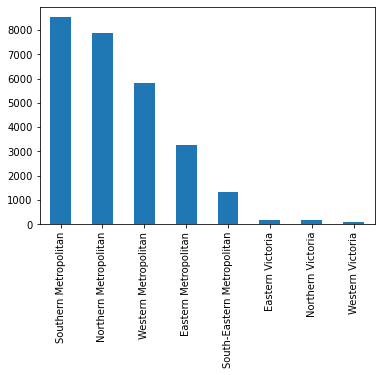

In [10]:
 #Plotting region name by value_counts
obj_df['Regionname'].value_counts().plot.bar()
#Checking mode of Region name
obj_df['Regionname'].mode() 

0    Boroondara City Council
dtype: object

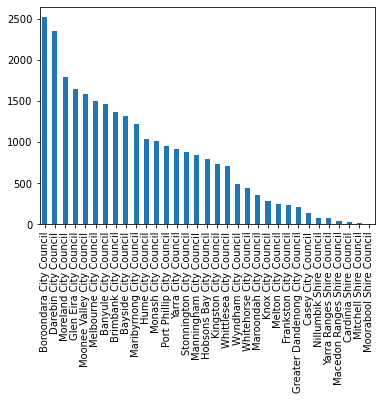

In [11]:
obj_df['CouncilArea'].value_counts().plot.bar() #Checking value_counts of Councl Area
obj_df['CouncilArea'].mode() #Checking mode of the Council Area

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Fillimg missing catergorical values in CouncilArea and Regionname with their respecive mode
obj_df['Regionname'].fillna('Southern Metropolitan',inplace = True)
obj_df['CouncilArea'].fillna('Boroondara City Council',inplace = True)
# Encoding Categorical values
# label_encoder = LabelEncoder()
# obj_df.iloc[:,0] = label_encoder.fit_transform(obj_df.iloc[:,0]).astype('float64')
# obj_df['Suburb']
obj_df = obj_df.apply(LabelEncoder().fit_transform)
obj_df = obj_df.apply(pd.to_numeric)
obj_df.dtypes

Suburb         int64
Address        int64
Type           int64
Method         int64
SellerG        int64
Date           int64
CouncilArea    int64
Regionname     int64
dtype: object

In [29]:
for var in  obj_df:
        # for each cat add dummy var, drop original column
    df2 = pd.concat([obj_df.drop(var, axis=1), pd.get_dummies(obj_df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
df2

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname_1,Regionname_2,Regionname_3,Regionname_4,Regionname_5,Regionname_6,Regionname_7
1,0,25617,0,1,32,55,31,0,1,0,0,0,0,0
2,0,12162,0,1,32,64,31,0,1,0,0,0,0,0
4,0,19857,0,3,32,65,31,0,1,0,0,0,0,0
5,0,18371,0,0,32,65,31,0,1,0,0,0,0,0
6,0,21399,0,4,206,66,31,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,342,4640,0,0,140,38,16,0,0,0,0,0,1,0
34853,342,13427,0,3,290,38,16,0,0,0,0,0,1,0
34854,342,5788,1,1,140,38,16,0,0,0,0,0,1,0
34855,342,4291,0,3,334,38,16,0,0,0,0,0,1,0


Let's select the rest of the data excluding object columns and fill their nulls with mean

In [31]:
rst_df = drpna.select_dtypes(include = ['float','int64']).copy() #Selecting rest of the data frame
fill_mean = lambda col:col.fillna(col.mean()) # Fill_mean 
mn_df = rst_df.apply(fill_mean, axis =0) # Applying fill mean to df 
# np.sum(mn_df.isnull().mean())
mn_df.columns
mv = rst_df.isnull().mean()
mv

Rooms            0.000000
Price            0.000000
Distance         0.000037
Postcode         0.000037
Bedroom2         0.236393
Bathroom         0.236613
Car              0.250450
Landsize         0.340037
BuildingArea     0.608911
YearBuilt        0.556502
Lattitude        0.229530
Longtitude       0.229530
Propertycount    0.000110
dtype: float64

In [32]:
#Joining those two data frames pd.concat([df1, df4], axis=1)
new_df = pd.concat([mn_df, obj_df], axis =1) 
np.sum(new_df.isnull().mean()) # checking for null values in new df
new_df = new_df.drop(['Date','Method'], axis = 1)
# print(new_df.columns)
# new_df.drop
new_df.reset_index(drop=True, inplace=True)

new_df.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount', 'Suburb', 'Address', 'Type', 'SellerG', 'CouncilArea',
       'Regionname'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022814373B50>,
      dtype=object)

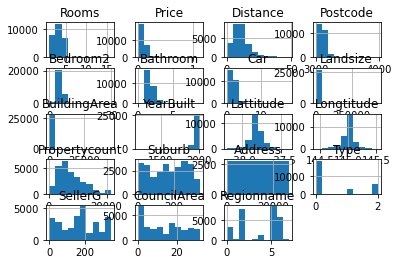

In [33]:
new_df.hist()

## Finding the highly correlated variables


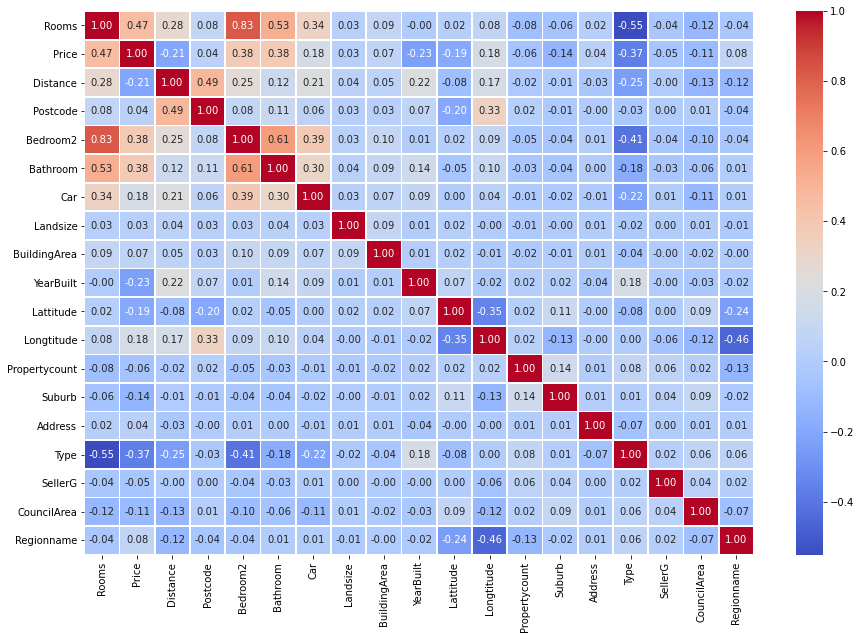

In [61]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(new_df.corr(),annot = True,cmap ='coolwarm' ,fmt =".2f",linewidths=.75, ax =ax)
plt.savefig("Correlation Matrix")

From the above correlation matrix we can clearly see that Rooms, bedrooms, bathrooms has highest correlation with the price.
Let's plot these values

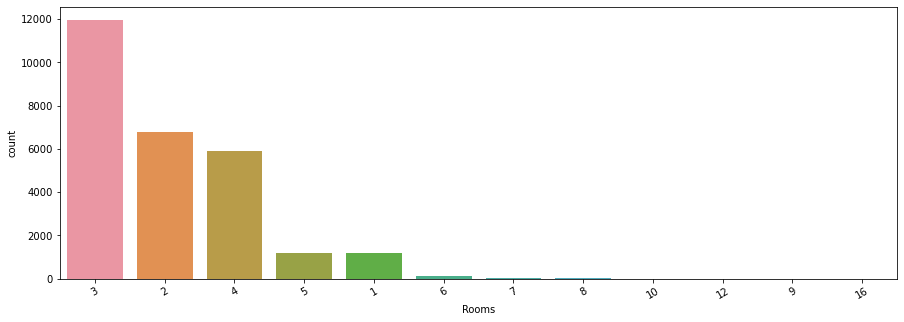

In [62]:
new_df['Rooms'].unique() ## Checking unique room types
plt.figure(figsize=(15,5))
plt.xticks(rotation=30)
ax = sns.countplot(x="Rooms", 
                   data=new_df,
                  order = new_df['Rooms'].value_counts().index)
plt.savefig("Rooms")

In [63]:
#Let's check the average land size of each House built
avg_land_size = int(round(new_df["Landsize"].mean()))
print("The average land size for each house is",avg_land_size)
#Finding the newest home built
newest_home_age = int(2021 - new_df['YearBuilt'].max())
print("Newest home age is", newest_home_age)

The average land size for each house is 593
Newest home age is 2


In [64]:
# Drop price from the data frame and copy this to another data frame
new_df_1 = new_df.drop(['Price'], axis=1)



In [65]:
from sklearn.model_selection import train_test_split
#Splitting the train and test data with a test size of 33%
X_train, X_test, y_train, y_test = train_test_split(
 new_df_1, new_df['Price'],test_size=0.33, random_state=42)
#Checking the columns in train data set
X_train.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount', 'Suburb', 'Address', 'Type', 'SellerG', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [70]:
# Predictions using Linear Regression
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score


In [76]:
#Validating predictions using Mean squared error
val_predictions = lm_model.predict(X_test)
MSE = mean_squared_error(val_predictions, y_test)
print("mean Squared Error is", MSE)


mean Squared Error is 457448222662.75714


R Square is  0.08071381191941407


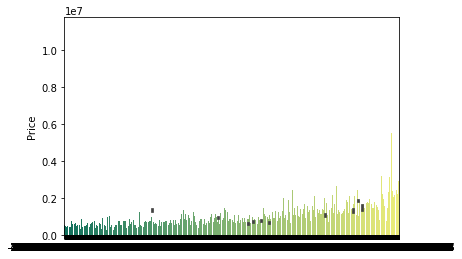

In [77]:
# Finding the R square of the model
R_sq = r2_score(val_predictions, y_test)
print("R Square is ",R_sq)
ax1 = sns.barplot(val_predictions,y_test,palette='summer')